In [1]:
import pyproj
import numpy as np
import verde as vd
import boule as bl
import harmonica as hm
import rockhound as rh
import matplotlib.pyplot as plt

In [2]:
data = hm.datasets.fetch_south_africa_gravity()

In [3]:
data

latitude  longitude  elevation    gravity
0     -34.39150   17.71900     -589.0  979724.79
1     -34.48000   17.76100     -495.0  979712.90
2     -34.35400   17.77433     -406.0  979725.89
3     -34.13900   17.78500     -267.0  979701.20
4     -34.42200   17.80500     -373.0  979719.00
...         ...        ...        ...        ...
14554 -17.95833   21.22500     1053.1  978182.09
14555 -17.98333   21.27500     1033.3  978183.09
14556 -17.99166   21.70833     1041.8  978182.69
14557 -17.95833   21.85000     1033.3  978193.18
14558 -17.94166   21.98333     1022.6  978211.38

[14559 rows x 4 columns]

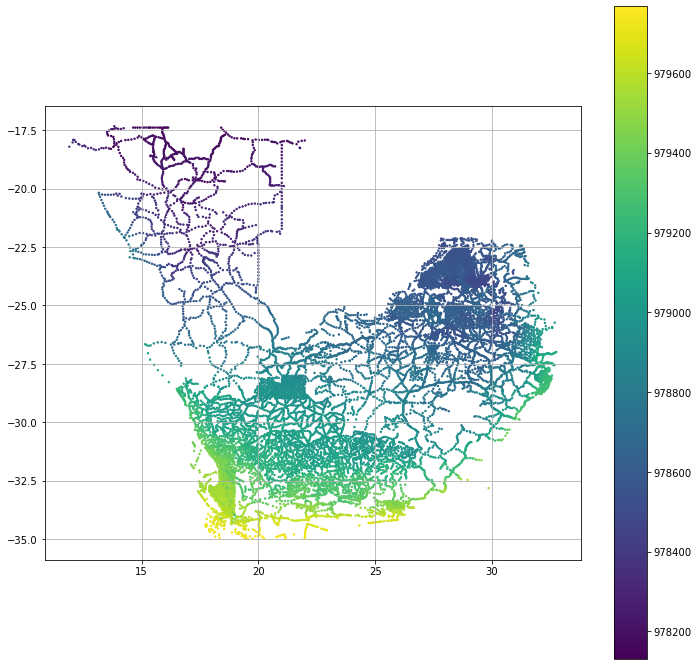

In [4]:
tmp = plt.scatter(data.longitude, data.latitude, c=data.gravity, s=2)
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(12, 12)
plt.colorbar(tmp)
plt.grid()
plt.show()

In [5]:
region = (25, 31, -28, -22)
inside = vd.inside((data.longitude, data.latitude), region)

In [6]:
data = data[inside]

In [7]:
data

latitude  longitude  elevation    gravity
7678  -27.67833   25.43668    1227.42  978783.95
7679  -27.41667   25.83000    1287.46  978744.16
7680  -27.87167   25.00000    1258.51  978786.05
7681  -27.06168   25.03168    1255.15  978757.56
7682  -27.25166   25.05000    1302.09  978724.47
...         ...        ...        ...        ...
13724 -22.77667   30.88834     456.89  978679.38
13725 -22.76666   30.93167     447.50  978684.89
13726 -22.74333   30.95500     463.60  978683.88
13727 -22.74167   30.99167     454.90  978683.38
13728 -22.65833   30.99667     464.40  978672.97

[4569 rows x 4 columns]

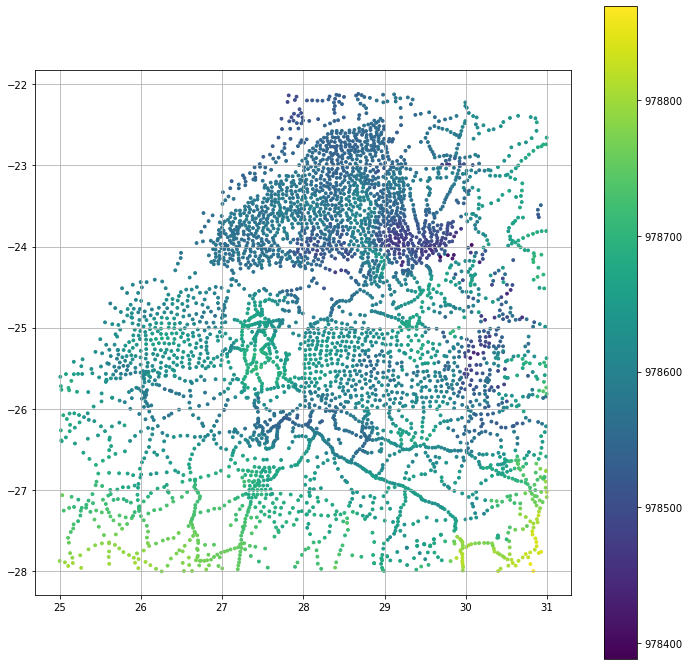

In [8]:
tmp = plt.scatter(data.longitude, data.latitude, c=data.gravity, s=8)
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(12, 12)
plt.colorbar(tmp)
plt.grid()
plt.show()

In [9]:
ell = bl.WGS84
data.loc[:, "gravity_disturbance"] = data.gravity.values - ell.normal_gravity(data.latitude.values, data.elevation.values)

/home/santi/.anaconda3/envs/t21-thurs-harmonica/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/santi/.anaconda3/envs/t21-thurs-harmonica/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
data

latitude  longitude  elevation    gravity  gravity_disturbance
7678  -27.67833   25.43668    1227.42  978783.95            15.111549
7679  -27.41667   25.83000    1287.46  978744.16            13.219703
7680  -27.87167   25.00000    1258.51  978786.05            12.407040
7681  -27.06168   25.03168    1255.15  978757.56            42.738587
7682  -27.25166   25.05000    1302.09  978724.47            10.197755
...         ...        ...        ...        ...                  ...
13724 -22.77667   30.88834     456.89  978679.38            13.538905
13725 -22.76666   30.93167     447.50  978684.89            16.795424
13726 -22.74333   30.95500     463.60  978683.88            22.256437
13727 -22.74167   30.99167     454.90  978683.38            19.178015
13728 -22.65833   30.99667     464.40  978672.97            17.054712

[4569 rows x 5 columns]

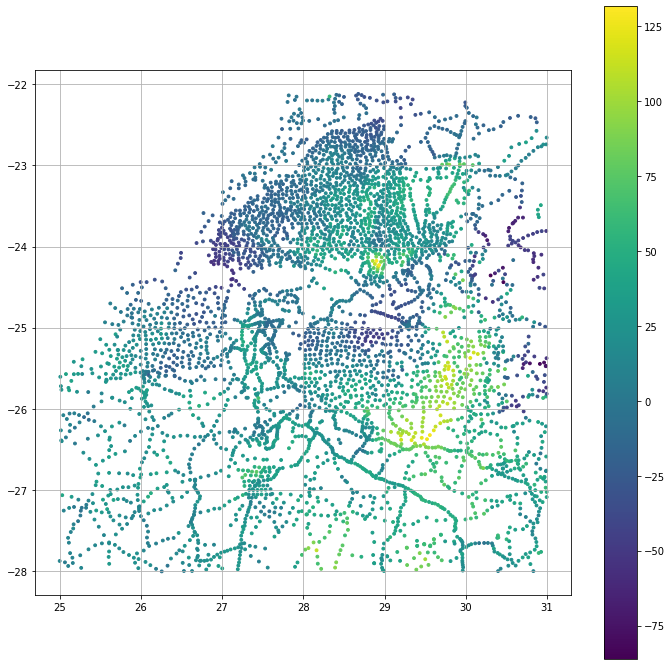

In [11]:
tmp = plt.scatter(data.longitude, data.latitude, c=data.gravity_disturbance, s=8)
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(12, 12)
plt.colorbar(tmp)
plt.grid()
plt.show()

In [12]:
etopo = rh.fetch_etopo1(version="bedrock")

In [13]:
etopo = etopo.sel(
    longitude=slice(region[0] - 0.5, region[1] + 0.5),
    latitude=slice(region[2] - 0.5, region[3] + 0.5),
)

In [14]:
etopo

<xarray.Dataset>
Dimensions:    (latitude: 420, longitude: 420)
Coordinates:
  * longitude  (longitude) float64 24.52 24.53 24.55 24.57 ... 31.47 31.48 31.5
  * latitude   (latitude) float64 -28.5 -28.48 -28.47 ... -21.55 -21.53 -21.52
Data variables:
    bedrock    (latitude, longitude) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1 Bedrock Relief
    GMT_version:  4.4.0
    node_offset:  0
    doi:          10.7289/V5C8276M

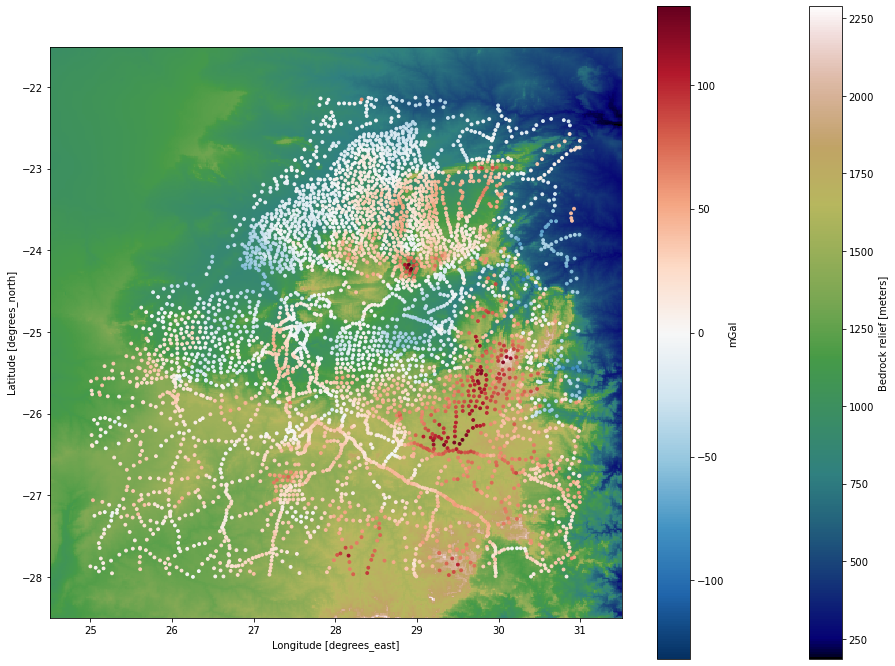

In [15]:
etopo.bedrock.plot(cmap="gist_earth")
maxabs = vd.maxabs(data.gravity_disturbance)
tmp = plt.scatter(data.longitude, data.latitude, c=data.gravity_disturbance, s=8, cmap="RdBu_r", vmin=-maxabs, vmax=maxabs)
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(16, 12)
plt.colorbar(tmp, label="mGal")
plt.show()

In [16]:
projection = pyproj.Proj(proj="merc", lat_ts=data.latitude.mean())
easting, northing = projection(data.longitude.values, data.latitude.values)

data.loc[:, "easting"] = easting
data.loc[:, "northing"] = northing

/home/santi/.anaconda3/envs/t21-thurs-harmonica/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/santi/.anaconda3/envs/t21-thurs-harmonica/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
data

latitude  longitude  elevation    gravity  gravity_disturbance  \
7678  -27.67833   25.43668    1227.42  978783.95            15.111549   
7679  -27.41667   25.83000    1287.46  978744.16            13.219703   
7680  -27.87167   25.00000    1258.51  978786.05            12.407040   
7681  -27.06168   25.03168    1255.15  978757.56            42.738587   
7682  -27.25166   25.05000    1302.09  978724.47            10.197755   
...         ...        ...        ...        ...                  ...   
13724 -22.77667   30.88834     456.89  978679.38            13.538905   
13725 -22.76666   30.93167     447.50  978684.89            16.795424   
13726 -22.74333   30.95500     463.60  978683.88            22.256437   
13727 -22.74167   30.99167     454.90  978683.38            19.178015   
13728 -22.65833   30.99667     464.40  978672.97            17.054712   

            easting      northing  
7678   2.567148e+06 -2.890841e+06  
7679   2.606843e+06 -2.861214e+06  
7680   2.523077e+06 -2.912779e+06  
7681   2.526274e+06 -2.821132e+06  
7682   2.528123e+06 -2.842566e+06  
...             ...           ...  
13724  3.117347e+06 -2.346751e+06  
13725  3.121720e+06 -2.345662e+06  
13726  3.124074e+06 -2.343123e+06  
13727  3.127775e+06 -2.342942e+06  
13728  3.128280e+06 -2.333877e+06  

[4569 rows x 7 columns]

In [18]:
etopo_plain = vd.project_grid(etopo.bedrock, projection=projection)
etopo_plain

<xarray.DataArray 'bedrock' (northing: 420, easting: 420)>
array([[          nan, 1128.66666667, 1126.        , ...,  658.        ,
         669.66666667,           nan],
       [          nan, 1133.30369631, 1126.97036297, ...,  466.8384944 ,
         536.50516107,           nan],
       [          nan, 1143.76180104, 1139.85863825, ...,  399.84306196,
         377.6175089 ,           nan],
       ...,
       [          nan,  960.6098968 ,  963.27656347, ...,  482.66812384,
         483.22125078,  488.77437772],
       [          nan,  956.61994659,  959.75893328, ...,  470.35983978,
         472.30447981,  476.65626647],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])
Coordinates:
  * easting   (easting) float64 2.474e+06 2.476e+06 ... 3.177e+06 3.179e+06
  * northing  (northing) float64 -2.984e+06 -2.983e+06 ... -2.212e+06 -2.21e+06
Attributes:
    metadata:  Generated by Chain(steps=[('mean',\n              BlockReduce(...

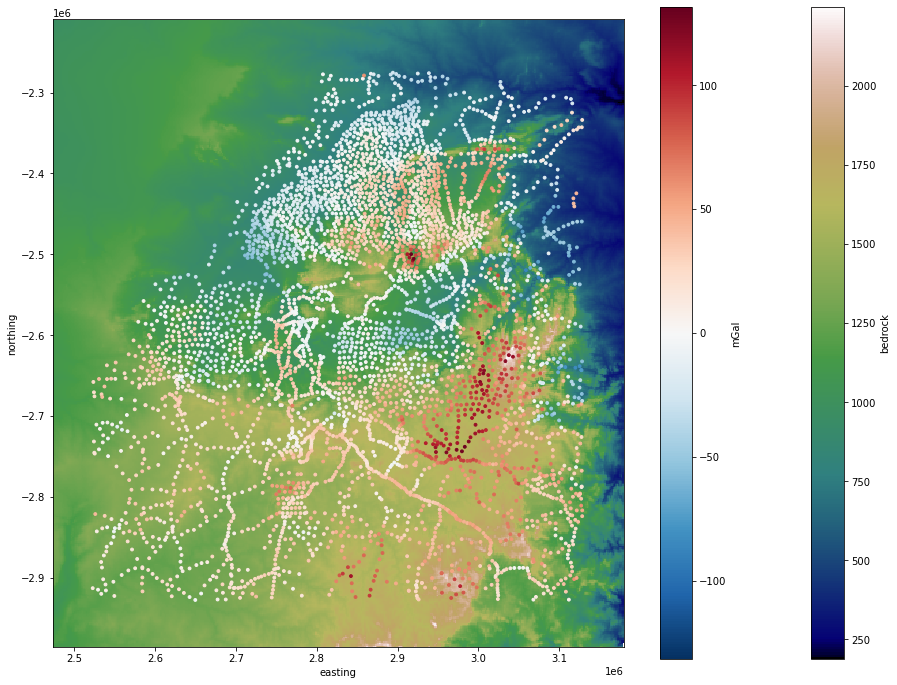

In [19]:
etopo_plain.plot(cmap="gist_earth")
maxabs = vd.maxabs(data.gravity_disturbance)
tmp = plt.scatter(data.easting, data.northing, c=data.gravity_disturbance, s=8, cmap="RdBu_r", vmin=-maxabs, vmax=maxabs)
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(16, 12)
plt.colorbar(tmp, label="mGal")
plt.show()

In [21]:
coordinates = (etopo_plain.easting.values, etopo_plain.northing.values)
reference = 0
surface = etopo_plain.values
surface[np.isnan(surface)] = reference
density = 2670 * np.ones_like(surface)

topo_prisms = hm.prisms_layer(
    coordinates,
    surface=surface,
    reference=0,
    properties={"density": density}
)
topo_prisms

<xarray.Dataset>
Dimensions:   (easting: 420, northing: 420)
Coordinates:
  * easting   (easting) float64 2.474e+06 2.476e+06 ... 3.177e+06 3.179e+06
  * northing  (northing) float64 -2.984e+06 -2.983e+06 ... -2.212e+06 -2.21e+06
    top       (northing, easting) float64 0.0 1.129e+03 1.126e+03 ... 0.0 0.0
    bottom    (northing, easting) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Data variables:
    density   (northing, easting) float64 2.67e+03 2.67e+03 ... 2.67e+03
Attributes:
    coords_units:      meters
    properties_units:  SI

In [23]:
coordinates = (data.easting.values, data.northing.values, data.elevation.values)
prisms = topo_prisms.prisms_layer.get_prisms()
density = topo_prisms.density.values

result = hm.prism_gravity(coordinates, prisms, density, field="g_z")

In [25]:
data.loc[:, "bouguer_disturbance"] = data.gravity_disturbance - result

/home/santi/.anaconda3/envs/t21-thurs-harmonica/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/santi/.anaconda3/envs/t21-thurs-harmonica/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [26]:
data

latitude  longitude  elevation    gravity  gravity_disturbance  \
7678  -27.67833   25.43668    1227.42  978783.95            15.111549   
7679  -27.41667   25.83000    1287.46  978744.16            13.219703   
7680  -27.87167   25.00000    1258.51  978786.05            12.407040   
7681  -27.06168   25.03168    1255.15  978757.56            42.738587   
7682  -27.25166   25.05000    1302.09  978724.47            10.197755   
...         ...        ...        ...        ...                  ...   
13724 -22.77667   30.88834     456.89  978679.38            13.538905   
13725 -22.76666   30.93167     447.50  978684.89            16.795424   
13726 -22.74333   30.95500     463.60  978683.88            22.256437   
13727 -22.74167   30.99167     454.90  978683.38            19.178015   
13728 -22.65833   30.99667     464.40  978672.97            17.054712   

            easting      northing  bouguer_disturbance  
7678   2.567148e+06 -2.890841e+06          -121.522656  
7679   2.606843e+06 -2.861214e+06          -130.141462  
7680   2.523077e+06 -2.912779e+06          -127.310152  
7681   2.526274e+06 -2.821132e+06           -94.428970  
7682   2.528123e+06 -2.842566e+06          -133.412249  
...             ...           ...                  ...  
13724  3.117347e+06 -2.346751e+06           -35.546169  
13725  3.121720e+06 -2.345662e+06           -31.647553  
13726  3.124074e+06 -2.343123e+06           -27.194843  
13727  3.127775e+06 -2.342942e+06           -30.143074  
13728  3.128280e+06 -2.333877e+06           -33.486911  

[4569 rows x 8 columns]

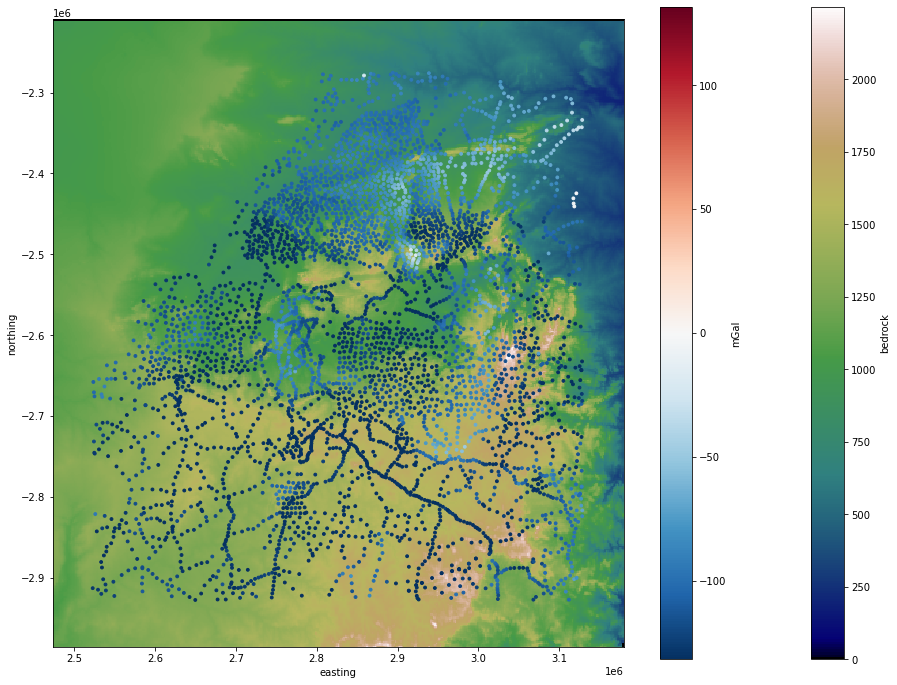

In [27]:
etopo_plain.plot(cmap="gist_earth")
maxabs = vd.maxabs(data.gravity_disturbance)
tmp = plt.scatter(data.easting, data.northing, c=data.bouguer_disturbance, s=8, cmap="RdBu_r", vmin=-maxabs, vmax=maxabs)
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(16, 12)
plt.colorbar(tmp, label="mGal")
plt.show()

In [114]:
eql = hm.EQLHarmonic(damping=1e1, relative_depth=10e3)
eql.fit(coordinates, data.bouguer_disturbance.values)

EQLHarmonic(damping=10.0, relative_depth=10000.0)

In [115]:
grid = eql.grid(upward=data.elevation.max(), region=region, spacing=0.01, data_names=["bouguer_disturbance"], projection=projection)

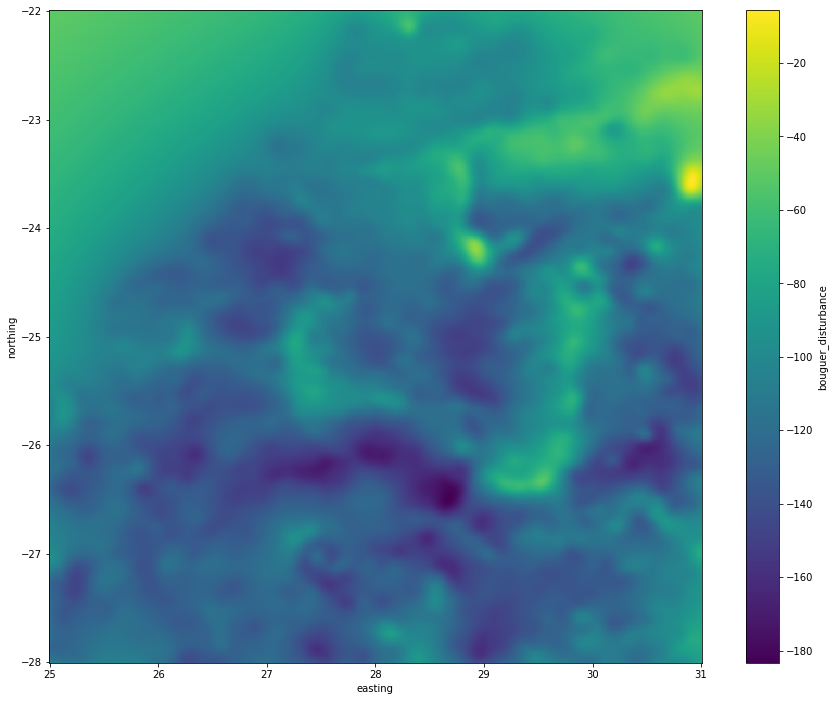

In [116]:
grid.bouguer_disturbance.plot()
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(16, 12)
plt.show()

In [117]:
grid = vd.convexhull_mask(data_coordinates=(data.longitude.values, data.latitude.values), grid=grid)

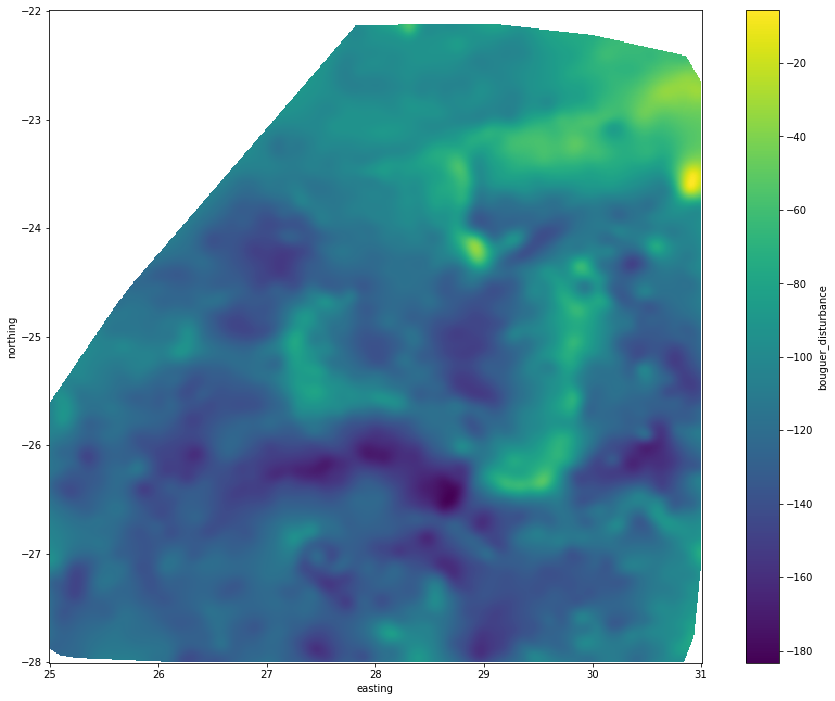

In [118]:
grid.bouguer_disturbance.plot()
plt.gca().set_aspect("equal")
plt.gcf().set_size_inches(16, 12)
plt.show()

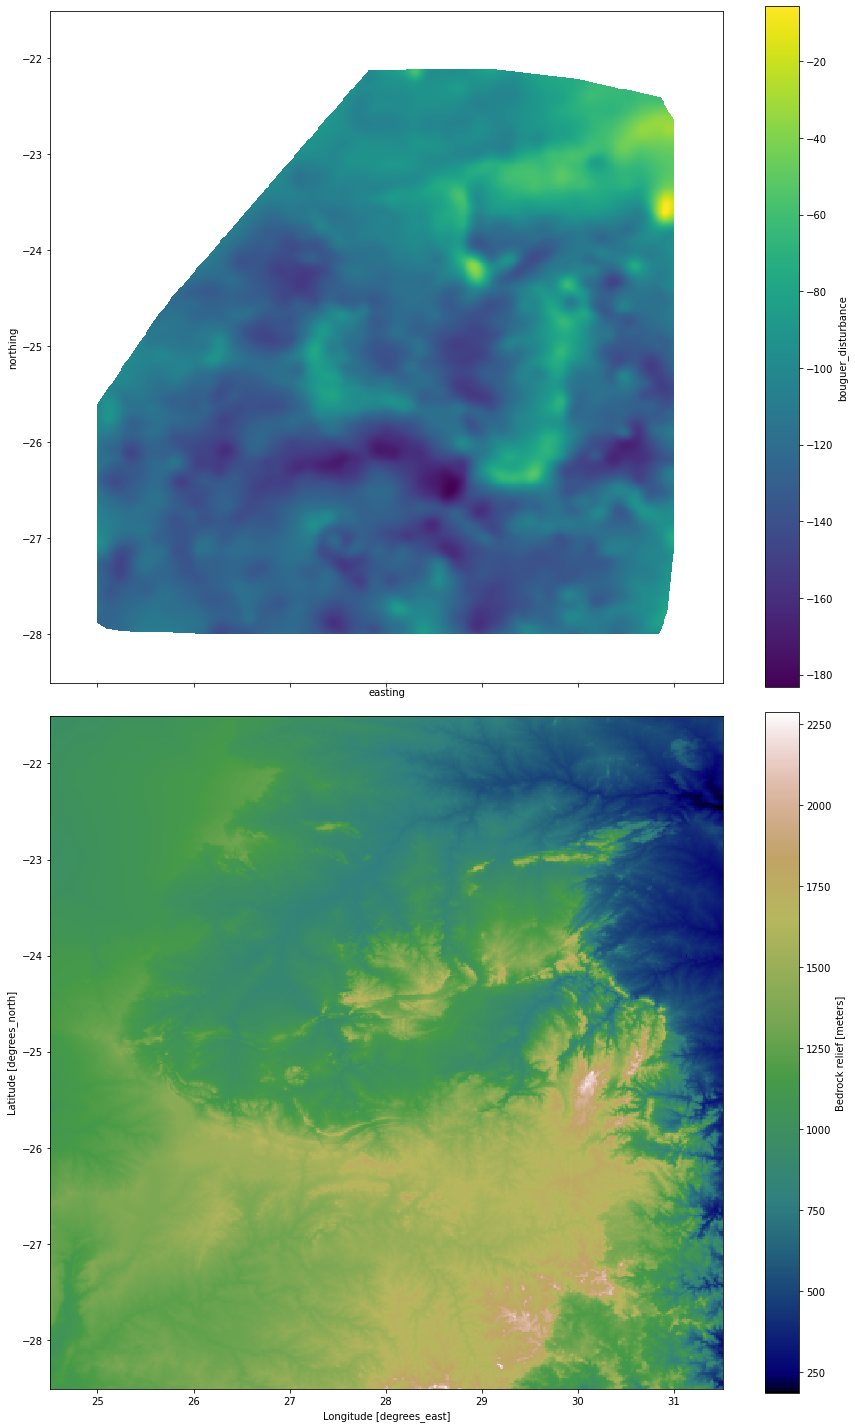

In [119]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 20))
grid.bouguer_disturbance.plot(ax=ax1)
ax1.set_aspect("equal")

etopo.bedrock.plot(ax=ax2, cmap="gist_earth")
ax2.set_aspect("equal")
plt.tight_layout()
plt.show()

In [120]:
point1 = (28, -22.3)
point2 = (30.3, -27)

profile = eql.profile(
    point1=point1,
    point2=point2,
    upward=data.elevation.max(),
    size=200,
    data_names=["bouguer_disturbance"],
    projection=projection,
)
profile

northing    easting       distance  upward  bouguer_disturbance
0   -22.300000  28.000000       0.000000  2144.0           -95.763070
1   -22.324055  28.011558    2858.000940  2144.0           -96.654462
2   -22.348106  28.023116    5716.001879  2144.0           -97.376527
3   -22.372153  28.034673    8574.002819  2144.0           -97.711527
4   -22.396195  28.046231   11432.003759  2144.0           -97.704007
..         ...        ...            ...     ...                  ...
195 -26.907329  30.253769  557310.183239  2144.0          -119.726968
196 -26.930504  30.265327  560168.184179  2144.0          -119.465899
197 -26.953674  30.276884  563026.185118  2144.0          -118.667871
198 -26.976839  30.288442  565884.186058  2144.0          -117.442952
199 -27.000000  30.300000  568742.186998  2144.0          -115.782855

[200 rows x 5 columns]

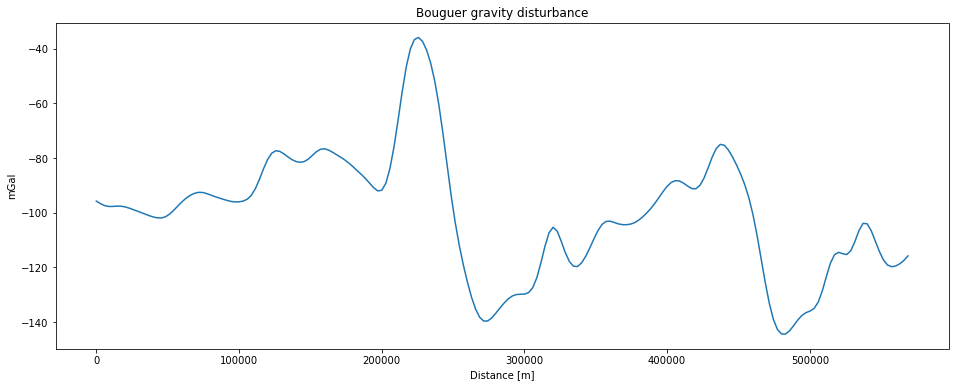

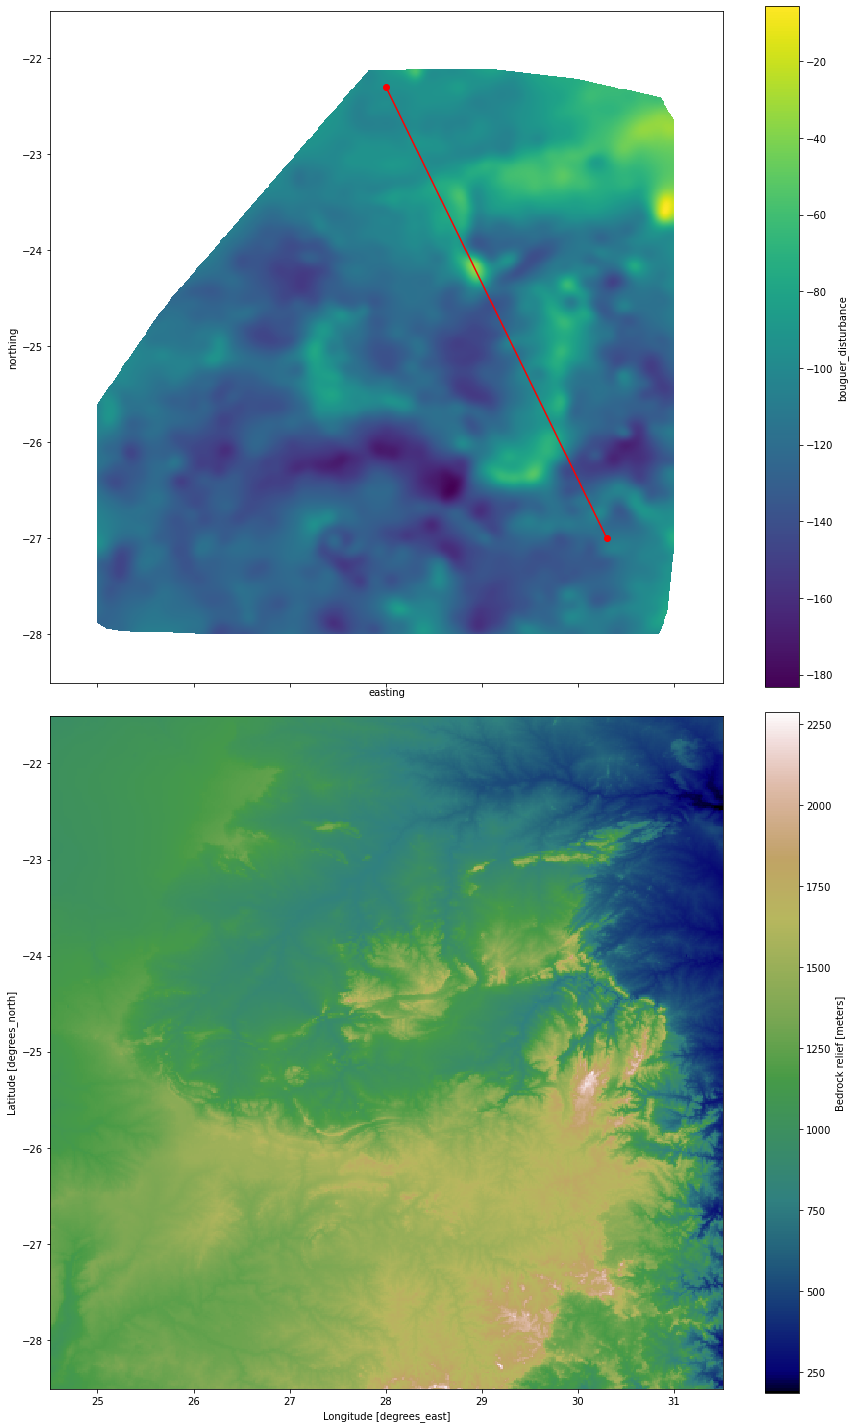

In [121]:
plt.plot(profile.distance, profile.bouguer_disturbance)
plt.ylabel("mGal")
plt.xlabel("Distance [m]")
plt.title("Bouguer gravity disturbance")
plt.gcf().set_size_inches(16, 6)
plt.show()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 20))
grid.bouguer_disturbance.plot(ax=ax1)
ax1.plot([point1[0], point2[0]], [point1[1], point2[1]], 'o-', color="red")
ax1.set_aspect("equal")

etopo.bedrock.plot(ax=ax2, cmap="gist_earth")
ax2.set_aspect("equal")
plt.tight_layout()
plt.show()